In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes #This dataest comes packed in with scikit learn library

data=load_diabetes()

In [6]:
print(data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [14]:
X=data.data #to get the data of all the 10 input columns
y=data.target #to get the target column

In [15]:
print(x)
y

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [17]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [18]:
L.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred=L.predict(X_test)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score", r2_score(y_test,y_pred))
print("RMSE Score", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.5189738344370791
RMSE Score 48.71890809371285


In [36]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [37]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
y_pred1=R.predict(X_test)

In [39]:
print("R2 Score", r2_score(y_test,y_pred1))
print("RMSE Score", np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 Score 0.5189738344370791
RMSE Score 48.71890809371285


In [ ]:
#we can see using Ridge Regression our model performs sligtly better

# Now, let's understand over-fitting and under-fitting

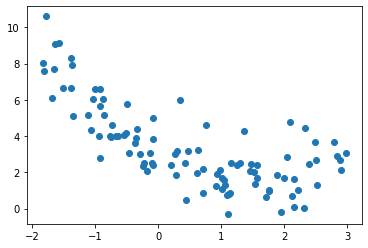

In [51]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

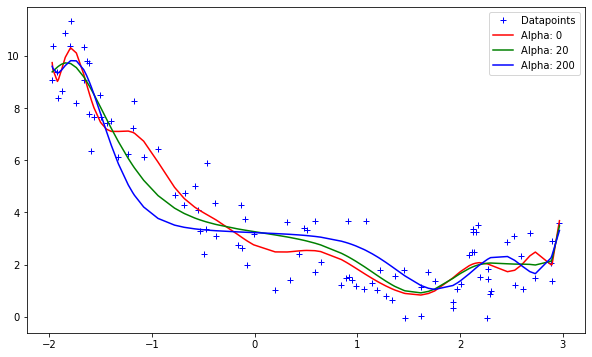

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)
alphas=[0,20,200]
cs=['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label='Datapoints')


for alpha, c in zip(alphas, cs):
    preds=get_preds_ridge(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label='Alpha: {}'.format(alpha))
    
plt.legend()
plt.show()

In [ ]:
# red is doing over-fitting
#blue is doing under-fitting
# green is the optimum model